In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
matplotlib.__version__

'3.3.2'

In [3]:
np.__version__

'1.19.0'

In [4]:
pd.__version__

'1.1.4'

In [5]:
# Choosing your style. Awailable options: default, ggplot, ...
plt.style.use('default') 

# matplotlib.pyplot
`plt.subplots` - returns 2 objects:
* `fig: Figure` - is a container that holds everything you see on the page 
* `ax: Axes` - contains data

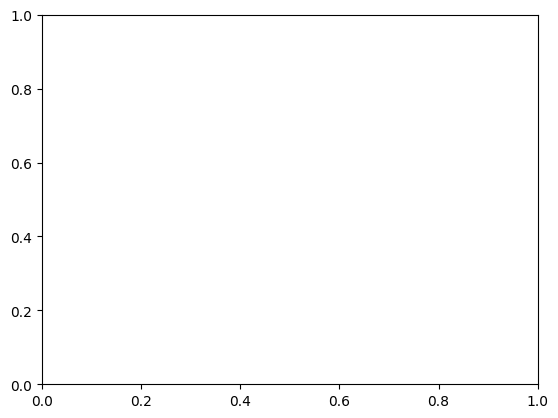

In [6]:
fig, ax = plt.subplots()
plt.show()

In [7]:
seattle_weather = pd.read_csv('datasets/seattle_weather.csv')
seattle_weather.iloc[:, :8]

,STATION,NAME,MONTH,MLY-CLDD-BASE45,MLY-CLDD-BASE50,MLY-CLDD-BASE55,MLY-CLDD-BASE57,MLY-CLDD-BASE60
0,USC00456295,"PALMER 3 ESE, WA US",1,13.0,1.0,-7777.0,0.0,0.0
1,USC00456295,"PALMER 3 ESE, WA US",2,23.0,3.0,-7777.0,-7777.0,0.0
2,USC00456295,"PALMER 3 ESE, WA US",3,50.0,11.0,1.0,-7777.0,-7777.0
3,USC00456295,"PALMER 3 ESE, WA US",4,108.0,40.0,12.0,7.0,3.0
4,USC00456295,"PALMER 3 ESE, WA US",5,255.0,130.0,56.0,38.0,19.0
...,...,...,...,...,...,...,...,...
199,USC00454169,"KENT, WA US",8,673.0,518.0,363.0,301.0,209.0
200,USC00454169,"KENT, WA US",9,493.0,344.0,200.0,149.0,85.0
201,USC00454169,"KENT, WA US",10,248.0,118.0,34.0,17.0,5.0
202,USC00454169,"KENT, WA US",11,78.0,19.0,2.0,1.0,-7777.0


In [8]:
seattle_weather_by_month = seattle_weather[['MONTH', 'MLY-TAVG-NORMAL', 'MLY-TAVG-STDDEV']] \
    .groupby(['MONTH']) \
    .mean()
seattle_weather_by_month.columns = ['avg of monthly avg', 'MLY-TAVG-STDDEV']
seattle_weather_by_month

,avg of monthly avg,MLY-TAVG-STDDEV
MONTH,,
1,40.980000,2.593333
2,42.320000,2.613333
3,45.693333,2.280000
4,49.646667,1.860000
5,55.186667,2.100000
6,60.093333,1.986667
7,64.733333,2.173333
8,65.106667,1.446667
9,60.040000,1.766667


In [9]:
austing_weather = pd.read_csv('datasets/austin_weather.csv')
austing_weather_by_month = austing_weather[['MONTH', 'MLY-TAVG-NORMAL', 'MLY-TAVG-STDDEV']] \
    .groupby(['MONTH']) \
    .mean()
austing_weather_by_month.columns = ['avg of monthly avg', 'MLY-TAVG-STDDEV']

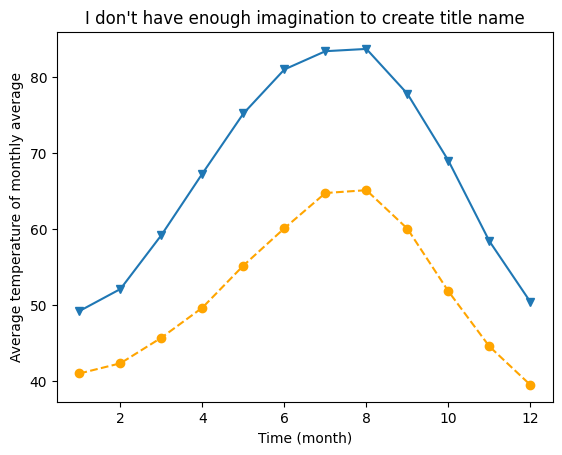

In [10]:
fig, ax = plt.subplots()
ax.plot(seattle_weather_by_month['avg of monthly avg'], marker='o', linestyle='--', color='orange')

# Instead of None you can use empty string
ax.plot(austing_weather_by_month['avg of monthly avg'], marker='v', linestyle=None)
ax.set_xlabel('Time (month)')
ax.set_ylabel('Average temperature of monthly average')
ax.set_title("I don't have enough imagination to create title name")
plt.show()

### Small multiples

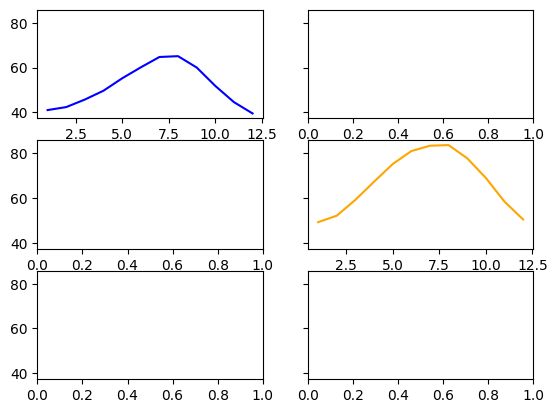

In [11]:
fig, ax = plt.subplots(3, 2, sharey=True) # sharey - means all subplots will have the same y-scale
ax[0, 0].plot(seattle_weather_by_month['avg of monthly avg'], color='b')
ax[1, 1].plot(austing_weather_by_month['avg of monthly avg'], color='orange')
plt.show()

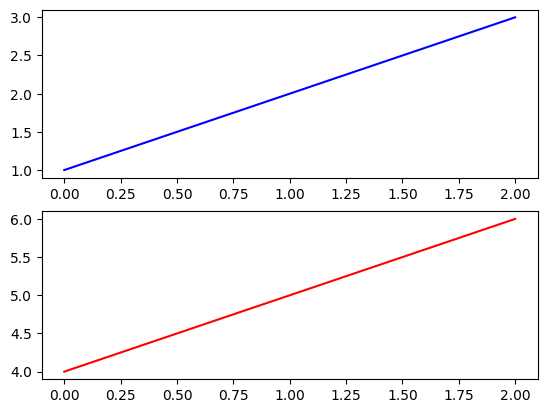

In [12]:
# (2, 1) - special case
fig, ax = plt.subplots(2, 1)
ax[0].plot([1, 2, 3], color='b')
ax[1].plot([4, 5, 6], color='r')
plt.show()

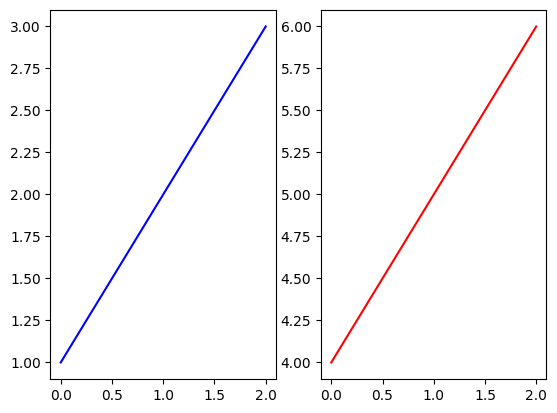

In [13]:
# (1, 2) - special case
fig, ax = plt.subplots(1, 2)
ax[0].plot([1, 2, 3], color='b')
ax[1].plot([4, 5, 6], color='r')
plt.show()

## Plotting time series

In [14]:
climate_change = pd.read_csv('datasets/climate_change.csv', index_col=['date'], parse_dates=True)
climate_change

,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06
...,...,...
2016-08-06,402.27,0.98
2016-09-06,401.05,0.87
2016-10-06,401.59,0.89


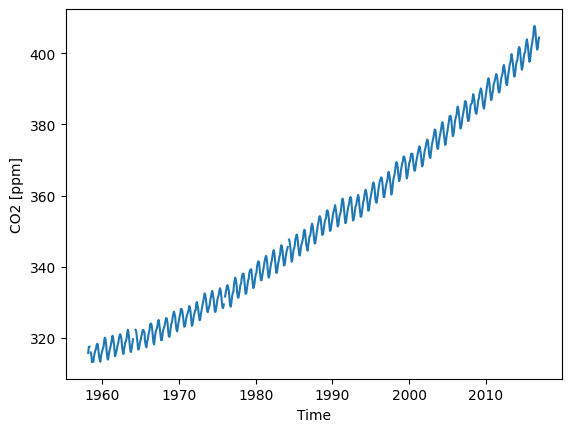

In [15]:
fig, ax = plt.subplots()
ax.plot(climate_change['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('CO2 [ppm]')
plt.show()

### Axes.annotate
`Axes.twinx` and `Axes.twiny` doesn't add a second axis to the existent plot, it creates a new axe to plot - you have to plot another function! If you want just to add a second axes, use `Axes.secondary_xaxis`

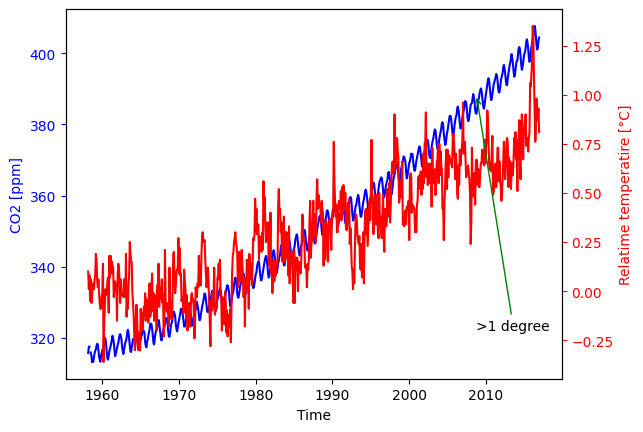

In [16]:
fig, ax = plt.subplots()
ax.plot(climate_change['co2'], color='blue')
ax.set_xlabel('Time')
ax.set_ylabel('CO2 [ppm]', color='blue')
ax.tick_params('y', color='blue', labelcolor='blue')

ax2 = ax.twinx()
ax2.plot(climate_change['relative_temp'], color='red')
ax2.set_ylabel('Relatime temperatire [°C]', color='red')
ax2.tick_params('y', color='red', labelcolor='red')
ax2.annotate('>1 degree', 
             xy=(pd.Timestamp('2008-10-06'), 1),
             xytext=(pd.Timestamp('2008-10-06'), -0.2),
             arrowprops={
                 'arrowstyle': '->',
                 'color': 'green'
             })

plt.show()

# Data comparisons
## Axes.bar

In [17]:
medals = pd.read_csv('datasets/medals_by_country_2016.csv', index_col=[0])
medals

,Bronze,Gold,Silver
United States,67,137,52
Germany,67,47,43
Great Britain,26,64,55
Russia,35,50,28
China,35,44,30
France,21,20,55
Australia,25,23,34
Italy,24,8,38
Canada,61,4,4
Japan,34,17,13


/home/yurii/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


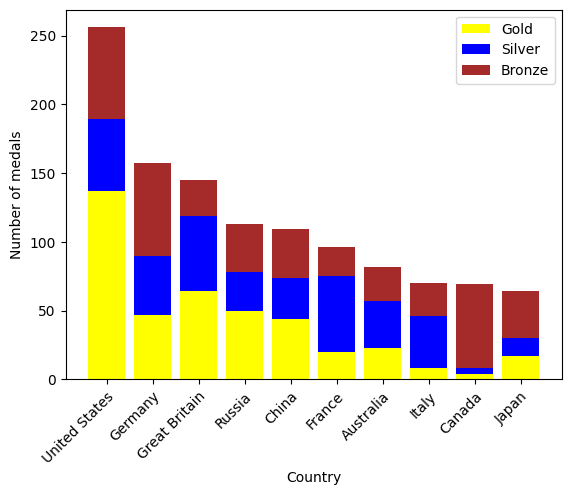

In [18]:
fig, ax = plt.subplots()
ax.bar(medals.index, medals['Gold'], color='yellow', label='Gold')
ax.bar(medals.index, medals['Silver'], bottom=medals['Gold'], color='blue', label='Silver')
ax.bar(medals.index, medals['Bronze'], bottom=medals['Gold'] + medals['Silver'], color='brown', label='Bronze')

ax.legend() # displays labels specified when plotting data
ax.set_xticklabels(medals.index, rotation=45, ha='right', rotation_mode='anchor')
ax.set_xlabel('Country')
ax.set_ylabel('Number of medals')
plt.show()

## Axes.hist
bar plot vs histogram

In [19]:
olimpics2016 = pd.read_csv('datasets/summer2016.csv', index_col=[0])
olimpics2016

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
450,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269511,134857,Zhu Ting,F,21.0,198.0,78.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Women's Volleyball,Gold
270111,135132,Bojana ivkovi,F,28.0,186.0,72.0,Serbia,SRB,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Women's Volleyball,Silver
270281,135205,Shakhobiddin Shokirovich Zoirov,M,23.0,169.0,52.0,Uzbekistan,UZB,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Flyweight,Gold
270370,135245,Milenko Zori,M,27.0,179.0,73.0,Serbia,SRB,2016 Summer,2016,Summer,Rio de Janeiro,Canoeing,"Canoeing Men's Kayak Doubles, 1,000 metres",Silver


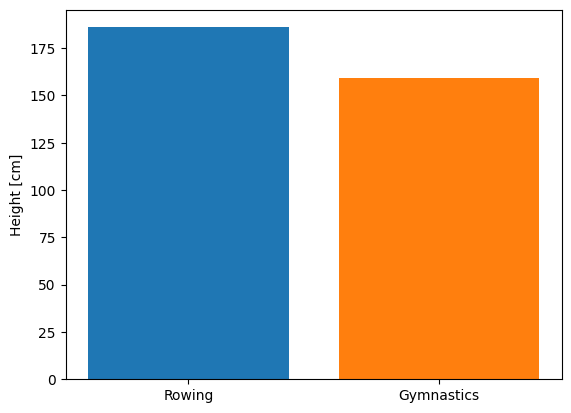

In [20]:
fig, ax = plt.subplots()
ax.bar('Rowing', olimpics2016[olimpics2016['Sport'] == 'Rowing']['Height'].mean())
ax.bar('Gymnastics', olimpics2016[olimpics2016['Sport'] == 'Gymnastics']['Height'].mean())
ax.set_ylabel('Height [cm]')
plt.show()

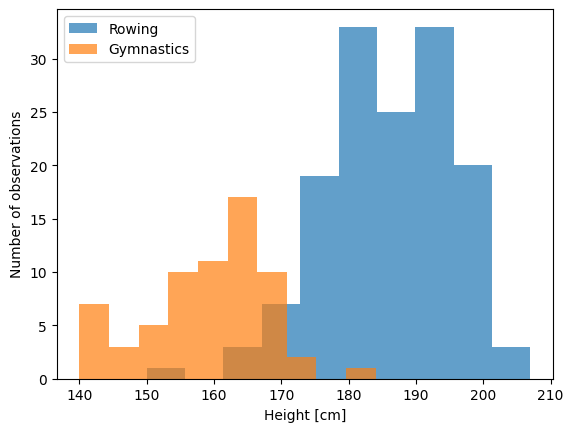

In [21]:
# Unlike bar plot, histograms show distribution of the variable. Default number of bins=10;
fig, ax = plt.subplots()
ax.hist(olimpics2016[olimpics2016['Sport'] == 'Rowing']['Height'], label='Rowing', alpha=0.7)
ax.hist(olimpics2016[olimpics2016['Sport'] == 'Gymnastics']['Height'], label='Gymnastics', alpha=0.7)
ax.set_xlabel('Height [cm]')
ax.set_ylabel('Number of observations')
ax.legend()
plt.show()

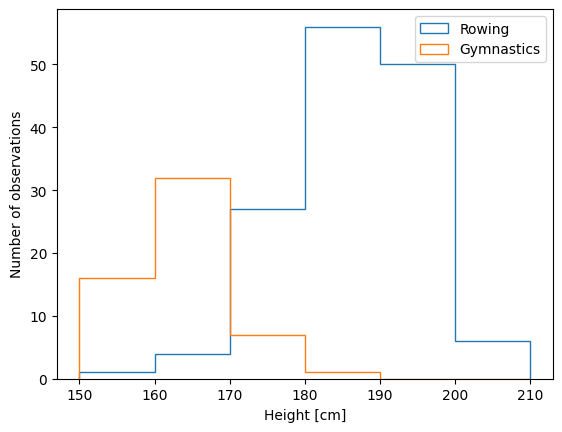

In [22]:
# You can provide a list of values which will be used as boundaries for bins.
# histtype='step' - displays histogram with lines only
fig, ax = plt.subplots()
ax.hist(
    olimpics2016[olimpics2016['Sport'] == 'Rowing']['Height'], 
    label='Rowing', 
    bins=[150, 160, 170, 180, 190, 200, 210],
    histtype='step'
)
ax.hist(
    olimpics2016[olimpics2016['Sport'] == 'Gymnastics']['Height'], 
    label='Gymnastics', 
    bins=[150, 160, 170, 180, 190, 200, 210],
    histtype='step'
)
ax.set_xlabel('Height [cm]')
ax.set_ylabel('Number of observations')
ax.legend()
plt.show()

## Adding error bars
### Axes.errorbar ~= Axes.plot

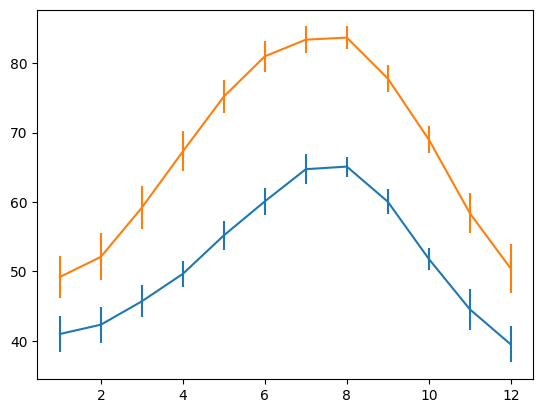

In [23]:
fig, ax = plt.subplots()
ax.errorbar(
    seattle_weather_by_month.index,
    seattle_weather_by_month['avg of monthly avg'], 
    yerr=seattle_weather_by_month['MLY-TAVG-STDDEV'],
)
ax.errorbar(
    seattle_weather_by_month.index,
    austing_weather_by_month['avg of monthly avg'], 
    yerr=austing_weather_by_month['MLY-TAVG-STDDEV']
)
plt.show()

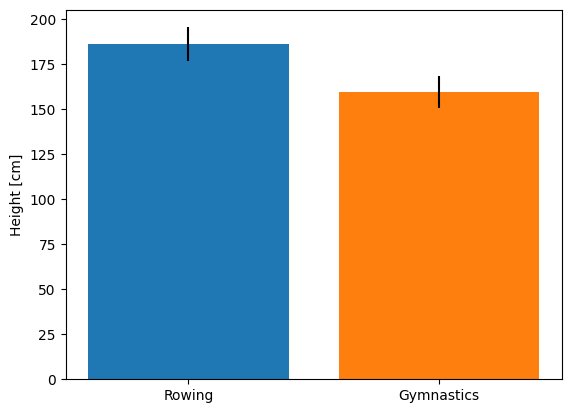

In [24]:
fig, ax = plt.subplots()
ax.bar(
    'Rowing', 
    olimpics2016[olimpics2016['Sport'] == 'Rowing']['Height'].mean(), 
    yerr=olimpics2016[olimpics2016['Sport'] == 'Rowing']['Height'].std())
ax.bar(
    'Gymnastics', 
    olimpics2016[olimpics2016['Sport'] == 'Gymnastics']['Height'].mean(),
    yerr=olimpics2016[olimpics2016['Sport'] == 'Gymnastics']['Height'].std()
)
ax.set_ylabel('Height [cm]')
plt.show()

## Axes.boxpot

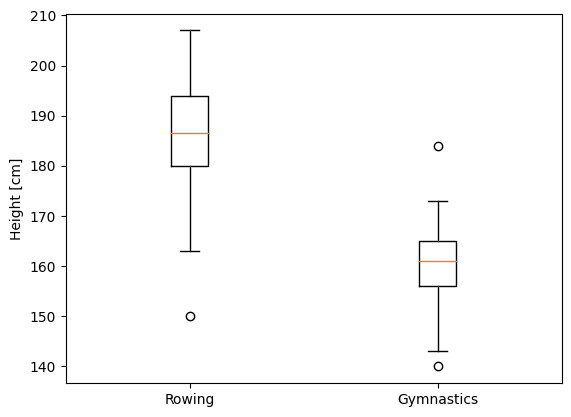

In [25]:
fig, ax = plt.subplots()
ax.boxplot([
    olimpics2016[olimpics2016['Sport'] == 'Rowing']['Height'],
    olimpics2016[olimpics2016['Sport'] == 'Gymnastics']['Height']
])
ax.set_xticklabels(['Rowing', 'Gymnastics'])
ax.set_ylabel('Height [cm]')
plt.show()

# Correlations
## Axes.scatter

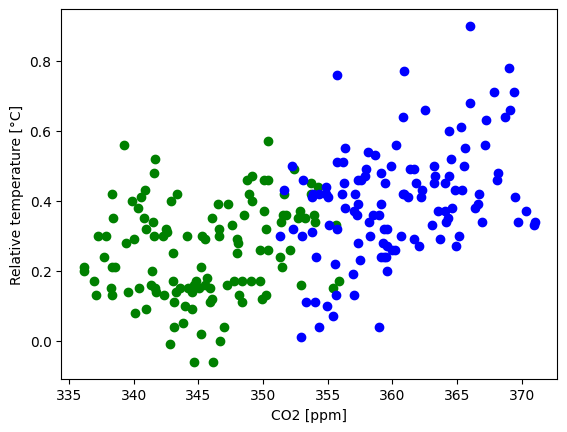

In [26]:
eighties = climate_change.loc['1980':'1989']
nineties = climate_change.loc['1990': '1999']
fig, ax = plt.subplots()
ax.scatter(eighties['co2'], eighties['relative_temp'], color='green', label='eighties')
ax.scatter(nineties['co2'], nineties['relative_temp'], color='blue', label='nineties')

ax.set_xlabel('CO2 [ppm]')
ax.set_ylabel('Relative temperature [°C]')
plt.show()

### color-code a varable
`c` - specify color as a string or can be used to color code a variable. DO NOT use `color` to color-code values!

In [27]:
climate_change.sort_values(['co2'])

,co2,relative_temp
date,,
1958-09-06,313.20,-0.03
1959-10-06,313.26,-0.09
1958-11-06,313.33,0.02
1960-10-06,313.83,0.07
1959-09-06,313.84,-0.06
...,...,...
1964-02-06,NaN,-0.12
1964-03-06,NaN,-0.22
1964-04-06,NaN,-0.30


In [28]:
def forward(ignored):
    return climate_change.index


def inverse(ignored):
    return np.flip(climate_change.index)

### Axex.secondary_xaxis
* https://matplotlib.org/3.2.1/gallery/subplots_axes_and_figures/secondary_axis.html
* https://www.geeksforgeeks.org/matplotlib-axes-axes-secondary_xaxis-in-python/

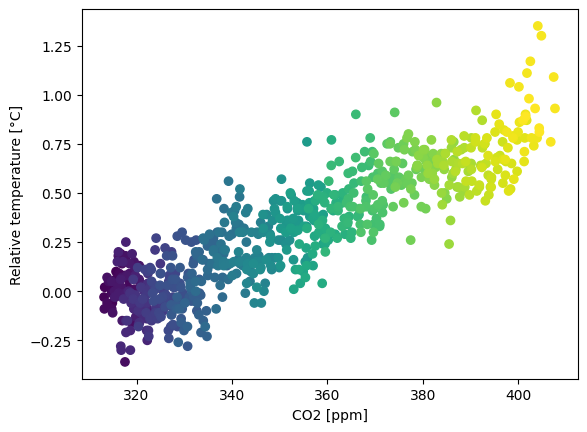

In [29]:
fig, ax = plt.subplots()
ax.scatter(climate_change['co2'], climate_change['relative_temp'], c=climate_change.index)
ax.set_xlabel('CO2 [ppm]')
ax.set_ylabel('Relative temperature [°C]')

# WTF? Axes.secondary_xaxis doesn't work - "too many values to unpack (expected 2)"
# secax = ax.secondary_xaxis('top', functions=(forward, inverse))
# secax.set_xlabel('Time [year]')

plt.show()

## Save to a file
```python
fig.set_size_inches([5, 3]) # you can set size before saving

fig.savefig('figname.png', dpi=300) # lossless compresion, but takes lots of space/bandwidth; dpi - specify pixel density
fig.savefig('figname.jpg') # good for websites
fig.savefig('figname.jpg', quality=50) # quality takes number in range [1:100]
fig.savefig('figname.svg') # can be addited afterwards
```

## Random Examples

In [30]:
years = [1950, 1970, 1990, 2010]
pop = [2.519, 3.692, 5.263, 6.972]

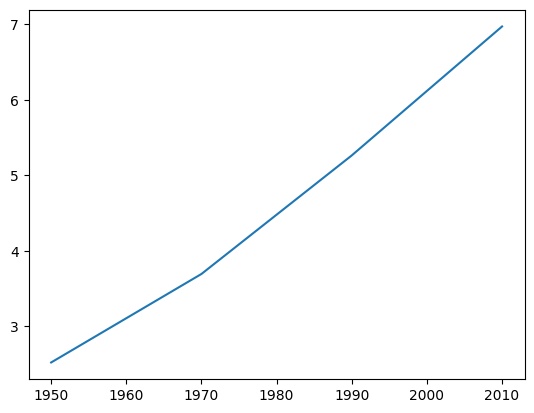

In [31]:
plt.plot(years, pop)
plt.show()

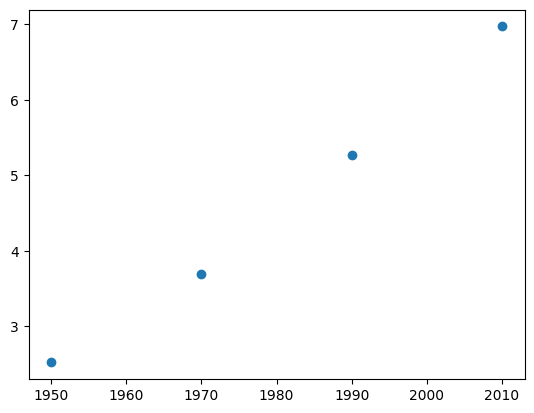

In [32]:
plt.scatter(years, pop)
plt.show()

In [33]:
gdp_cap = [974.5803384, 5937.029525999998, 6223.367465, 4797.231267, 12779.37964, 34435.367439999995, 36126.4927, 29796.04834, 1391.253792, 33692.60508, 1441.284873, 3822.137084, 7446.298803, 12569.85177, 9065.800825, 10680.79282, 1217.032994, 430.0706916, 1713.778686, 2042.09524, 36319.23501, 706.016537, 1704.063724, 13171.63885, 4959.114854, 7006.580419, 986.1478792, 277.5518587, 3632.557798, 9645.06142, 1544.750112, 14619.222719999998, 8948.102923, 22833.30851, 35278.41874, 2082.4815670000007, 6025.3747520000015, 6873.262326000001, 5581.180998, 5728.353514, 12154.08975, 641.3695236000002, 690.8055759, 33207.0844, 30470.0167, 13206.48452, 752.7497265, 32170.37442, 1327.60891, 27538.41188, 5186.050003, 942.6542111, 579.2317429999998, 1201.637154, 3548.3308460000007, 39724.97867, 18008.94444, 36180.78919, 2452.210407, 3540.651564, 11605.71449, 4471.061906, 40675.99635, 25523.2771, 28569.7197, 7320.8802620000015, 31656.06806, 4519.461171, 1463.249282, 1593.06548, 23348.139730000006, 47306.98978, 10461.05868, 1569.331442, 414.5073415, 12057.49928, 1044.770126, 759.3499101, 12451.6558, 1042.581557, 1803.151496, 10956.99112, 11977.57496, 3095.7722710000007, 9253.896111, 3820.17523, 823.6856205, 944.0, 4811.060429, 1091.359778, 36797.93332, 25185.00911, 2749.320965, 619.6768923999998, 2013.977305, 49357.19017, 22316.19287, 2605.94758, 9809.185636, 4172.838464, 7408.905561, 3190.481016, 15389.924680000002, 20509.64777, 19328.70901, 7670.122558, 10808.47561, 863.0884639000002, 1598.435089, 21654.83194, 1712.472136, 9786.534714, 862.5407561000002, 47143.17964, 18678.31435, 25768.25759, 926.1410683, 9269.657808, 28821.0637, 3970.095407, 2602.394995, 4513.480643, 33859.74835, 37506.41907, 4184.548089, 28718.27684, 1107.482182, 7458.396326999998, 882.9699437999999, 18008.50924, 7092.923025, 8458.276384, 1056.380121, 33203.26128, 42951.65309, 10611.46299, 11415.80569, 2441.576404, 3025.349798, 2280.769906, 1271.211593, 469.70929810000007]
life_exp = [43.828, 76.423, 72.301, 42.731, 75.32, 81.235, 79.829, 75.635, 64.062, 79.441, 56.728, 65.554, 74.852, 50.728, 72.39, 73.005, 52.295, 49.58, 59.723, 50.43, 80.653, 44.74100000000001, 50.651, 78.553, 72.961, 72.889, 65.152, 46.462, 55.322, 78.782, 48.328, 75.748, 78.273, 76.486, 78.332, 54.791, 72.235, 74.994, 71.33800000000002, 71.878, 51.57899999999999, 58.04, 52.947, 79.313, 80.657, 56.735, 59.448, 79.406, 60.022, 79.483, 70.259, 56.007, 46.38800000000001, 60.916, 70.19800000000001, 82.208, 73.33800000000002, 81.757, 64.69800000000001, 70.65, 70.964, 59.545, 78.885, 80.745, 80.546, 72.567, 82.603, 72.535, 54.11, 67.297, 78.623, 77.58800000000002, 71.993, 42.592, 45.678, 73.952, 59.44300000000001, 48.303, 74.241, 54.467, 64.164, 72.801, 76.195, 66.803, 74.543, 71.164, 42.082, 62.069, 52.90600000000001, 63.785, 79.762, 80.204, 72.899, 56.867, 46.859, 80.196, 75.64, 65.483, 75.53699999999998, 71.752, 71.421, 71.688, 75.563, 78.098, 78.74600000000002, 76.442, 72.476, 46.242, 65.528, 72.777, 63.062, 74.002, 42.56800000000001, 79.972, 74.663, 77.926, 48.159, 49.339, 80.941, 72.396, 58.556, 39.613, 80.884, 81.70100000000002, 74.143, 78.4, 52.517, 70.616, 58.42, 69.819, 73.923, 71.777, 51.542, 79.425, 78.242, 76.384, 73.747, 74.249, 73.422, 62.698, 42.38399999999999, 43.487]
pop = [31.889923, 3.600523, 33.333216, 12.420476, 40.301927, 20.434176, 8.199783, 0.708573, 150.448339, 10.392226, 8.078314, 9.119152, 4.552198, 1.639131, 190.010647, 7.322858, 14.326203, 8.390505, 14.131858, 17.696293, 33.390141, 4.369038, 10.238807, 16.284741, 1318.683096, 44.22755, 0.71096, 64.606759, 3.80061, 4.133884, 18.013409, 4.493312, 11.416987, 10.228744, 5.46812, 0.496374, 9.319622, 13.75568, 80.264543, 6.939688, 0.551201, 4.906585, 76.511887, 5.23846, 61.083916, 1.454867, 1.688359, 82.400996, 22.873338, 10.70629, 12.572928, 9.947814, 1.472041, 8.502814, 7.483763, 6.980412, 9.956108, 0.301931, 1110.396331, 223.547, 69.45357, 27.499638, 4.109086, 6.426679, 58.147733, 2.780132, 127.467972, 6.053193, 35.610177, 23.301725, 49.04479, 2.505559, 3.921278, 2.012649, 3.193942, 6.036914, 19.167654, 13.327079, 24.821286, 12.031795, 3.270065, 1.250882, 108.700891, 2.874127, 0.684736, 33.757175, 19.951656, 47.76198, 2.05508, 28.90179, 16.570613, 4.115771, 5.675356, 12.894865, 135.031164, 4.627926, 3.204897, 169.270617, 3.242173, 6.667147, 28.674757, 91.077287, 38.518241, 10.642836, 3.942491, 0.798094, 22.276056, 8.860588, 0.199579, 27.601038, 12.267493, 10.150265, 6.144562, 4.553009, 5.447502, 2.009245, 9.118773, 43.997828, 40.448191, 20.378239, 42.292929, 1.133066, 9.031088, 7.554661, 19.314747, 23.174294, 38.13964, 65.068149, 5.701579, 1.056608, 10.276158, 71.158647, 29.170398, 60.776238, 301.139947, 3.447496, 26.084662, 85.262356, 4.018332, 22.211743, 11.746035, 12.311143]
col = ['red', 'green', 'blue', 'blue', 'yellow', 'black', 'green', 'red', 'red', 'green', 'blue', 'yellow', 'green', 'blue', 'yellow', 'green', 'blue', 'blue', 'red', 'blue', 'yellow', 'blue', 'blue', 'yellow', 'red', 'yellow', 'blue', 'blue', 'blue', 'yellow', 'blue', 'green', 'yellow', 'green', 'green', 'blue', 'yellow', 'yellow', 'blue', 'yellow', 'blue', 'blue', 'blue', 'green', 'green', 'blue', 'blue', 'green', 'blue', 'green', 'yellow', 'blue', 'blue', 'yellow', 'yellow', 'red', 'green', 'green', 'red', 'red', 'red', 'red', 'green', 'red', 'green', 'yellow', 'red', 'red', 'blue', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'yellow', 'red', 'green', 'blue', 'blue', 'red', 'blue', 'red', 'green', 'black', 'yellow', 'blue', 'blue', 'green', 'red', 'red', 'yellow', 'yellow', 'yellow', 'red', 'green', 'green', 'yellow', 'blue', 'green', 'blue', 'blue', 'red', 'blue', 'green', 'blue', 'red', 'green', 'green', 'blue', 'blue', 'green', 'red', 'blue', 'blue', 'green', 'green', 'red', 'red', 'blue', 'red', 'blue', 'yellow', 'blue', 'green', 'blue', 'green', 'yellow', 'yellow', 'yellow', 'red', 'red', 'red', 'blue', 'blue']

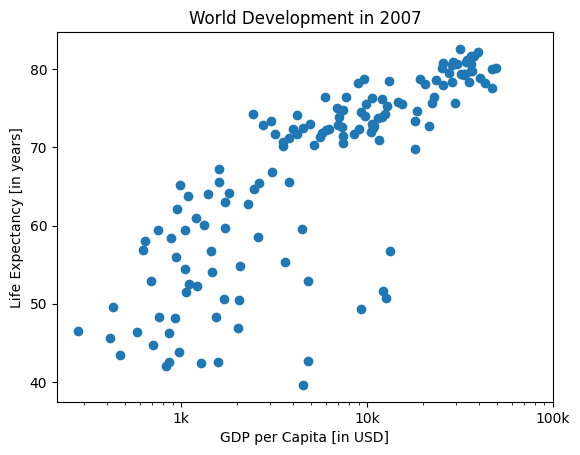

In [34]:
# Scatter plot
plt.scatter(gdp_cap, life_exp)

# Previous customizations
plt.xscale('log') 
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in 2007')

# Definition of tick_val and tick_lab
tick_val = [1000, 10000, 100000]
tick_lab = ['1k', '10k', '100k']

# Adapt the ticks on the x-axis
plt.xticks(tick_val, tick_lab)

# After customizing, display the plot
plt.show()

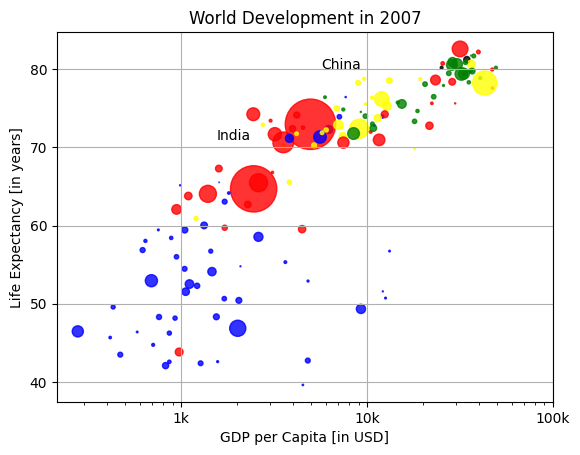

In [35]:
# s - scale each dot, in this case by country populcation
# alpha - opacity 
# c - colour
plt.scatter(gdp_cap, life_exp, s=pop, alpha=0.8, c=col)

# Previous customizations
plt.xscale('log') 
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in 2007')
plt.xticks([1000, 10000, 100000],['1k', '10k', '100k'])

# Show grid
plt.grid(True)

# Show text for dots, first to args (x and y) are dot coordinates
plt.text(1550, 71, 'India')
plt.text(5700, 80, 'China')

# Display the plot
plt.show()

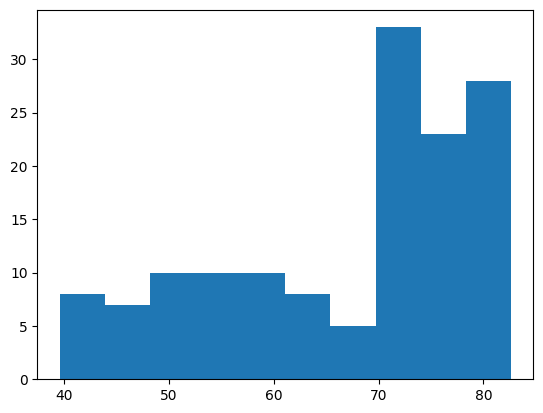

<Figure size 640x480 with 0 Axes>

In [36]:
# create a histgogram and seperate the result into 10 bins
# y-ax represent number of elemetns in each bin (group)
plt.hist(life_exp, bins=10)
plt.show()
plt.clf() # cleans the plot after